In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2022/train.csv
/kaggle/input/widsdatathon2022/test.csv
/kaggle/input/widsdatathon2022/sample_solution.csv


In [2]:
widsDf = pd.read_csv("/kaggle/input/widsdatathon2022/train.csv")
widsDf.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [3]:
widsDf.shape

(75757, 64)

In [4]:
widsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [5]:
widsDf.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [6]:
widsDf.isna().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [7]:
[(column, widsDf[column].isna().sum()) for column in widsDf.columns]

[('Year_Factor', 0),
 ('State_Factor', 0),
 ('building_class', 0),
 ('facility_type', 0),
 ('floor_area', 0),
 ('year_built', 1837),
 ('energy_star_rating', 26709),
 ('ELEVATION', 0),
 ('january_min_temp', 0),
 ('january_avg_temp', 0),
 ('january_max_temp', 0),
 ('february_min_temp', 0),
 ('february_avg_temp', 0),
 ('february_max_temp', 0),
 ('march_min_temp', 0),
 ('march_avg_temp', 0),
 ('march_max_temp', 0),
 ('april_min_temp', 0),
 ('april_avg_temp', 0),
 ('april_max_temp', 0),
 ('may_min_temp', 0),
 ('may_avg_temp', 0),
 ('may_max_temp', 0),
 ('june_min_temp', 0),
 ('june_avg_temp', 0),
 ('june_max_temp', 0),
 ('july_min_temp', 0),
 ('july_avg_temp', 0),
 ('july_max_temp', 0),
 ('august_min_temp', 0),
 ('august_avg_temp', 0),
 ('august_max_temp', 0),
 ('september_min_temp', 0),
 ('september_avg_temp', 0),
 ('september_max_temp', 0),
 ('october_min_temp', 0),
 ('october_avg_temp', 0),
 ('october_max_temp', 0),
 ('november_min_temp', 0),
 ('november_avg_temp', 0),
 ('november_max_te

In [8]:
widsDf.drop(["direction_max_wind_speed","direction_peak_wind_speed","max_wind_speed","days_with_fog"], inplace=True, axis=1)

In [9]:
widsDf.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

array([[<AxesSubplot:title={'center':'Year_Factor'}>,
        <AxesSubplot:title={'center':'floor_area'}>,
        <AxesSubplot:title={'center':'year_built'}>,
        <AxesSubplot:title={'center':'energy_star_rating'}>,
        <AxesSubplot:title={'center':'ELEVATION'}>,
        <AxesSubplot:title={'center':'january_min_temp'}>,
        <AxesSubplot:title={'center':'january_avg_temp'}>,
        <AxesSubplot:title={'center':'january_max_temp'}>],
       [<AxesSubplot:title={'center':'february_min_temp'}>,
        <AxesSubplot:title={'center':'february_avg_temp'}>,
        <AxesSubplot:title={'center':'february_max_temp'}>,
        <AxesSubplot:title={'center':'march_min_temp'}>,
        <AxesSubplot:title={'center':'march_avg_temp'}>,
        <AxesSubplot:title={'center':'march_max_temp'}>,
        <AxesSubplot:title={'center':'april_min_temp'}>,
        <AxesSubplot:title={'center':'april_avg_temp'}>],
       [<AxesSubplot:title={'center':'april_max_temp'}>,
        <AxesSubplot:title

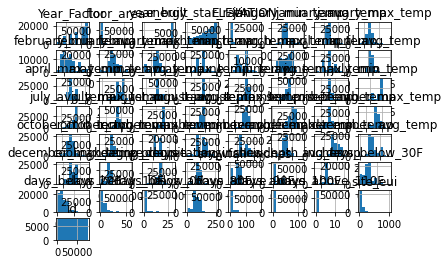

In [10]:
widsDf.hist()

In [11]:
widsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Factor           75757 non-null  int64  
 1   State_Factor          75757 non-null  object 
 2   building_class        75757 non-null  object 
 3   facility_type         75757 non-null  object 
 4   floor_area            75757 non-null  float64
 5   year_built            73920 non-null  float64
 6   energy_star_rating    49048 non-null  float64
 7   ELEVATION             75757 non-null  float64
 8   january_min_temp      75757 non-null  int64  
 9   january_avg_temp      75757 non-null  float64
 10  january_max_temp      75757 non-null  int64  
 11  february_min_temp     75757 non-null  int64  
 12  february_avg_temp     75757 non-null  float64
 13  february_max_temp     75757 non-null  int64  
 14  march_min_temp        75757 non-null  int64  
 15  march_avg_temp     

In [12]:
widsDf['State_Factor'].value_counts()

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64

In [13]:
widsDf['building_class'].value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [14]:
widsDf['facility_type'].value_counts()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

In [15]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
widsDf['State_Factor']= label_encoder.fit_transform(widsDf['State_Factor']) 
widsDf['building_class']= label_encoder.fit_transform(widsDf['building_class']) 
widsDf['facility_type']= label_encoder.fit_transform(widsDf['facility_type'])
widsDf.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.5,...,0,0,0,0,14,0,0,0,248.682615,0
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.5,...,0,0,0,0,14,0,0,0,26.500150,1
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.5,...,0,0,0,0,14,0,0,0,24.693619,2
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.5,...,0,0,0,0,14,0,0,0,48.406926,3
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.5,...,0,0,0,0,14,0,0,0,3.899395,4


In [16]:
widsDf_corr=widsDf.corr()
widsDf_corr.style.background_gradient(cmap="cool")

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
Year_Factor,1.000000,-0.096798,-0.026198,-0.120038,-0.036363,0.084143,-0.005052,0.132855,0.007913,-0.099628,-0.291137,-0.391312,-0.101799,-0.093735,-0.054079,0.051545,0.167406,-0.463176,-0.164931,-0.212332,-0.274205,-0.196895,0.114799,-0.309140,-0.097698,-0.406461,-0.103637,-0.190931,-0.408861,-0.072133,0.171693,0.338786,0.095091,0.180126,-0.078937,-0.097073,-0.144199,-0.062649,0.148017,0.360374,0.355420,-0.260890,-0.119175,-0.323793,0.032302,0.068750,-0.124418,0.182135,0.087389,-0.058627,0.137436,0.260270,0.263467,0.209500,0.185233,0.054718,-0.043701,-0.013635,-0.045179,0.534754
State_Factor,-0.096798,1.000000,0.288096,0.119659,0.061200,-0.040046,-0.141180,-0.114672,-0.740626,-0.727184,-0.391280,-0.689259,-0.659538,-0.592823,-0.540011,-0.563472,-0.293470,-0.566364,-0.613088,-0.393297,0.026264,0.310017,0.092329,0.164755,0.562985,-0.353916,0.670700,0.759978,0.273593,0.513566,0.658500,0.171128,0.259843,0.408659,0.251107,-0.509631,-0.387820,-0.135173,-0.354942,-0.440472,-0.190081,-0.191690,-0.278519,0.112208,0.635556,0.705139,0.622361,0.663685,0.413849,-0.401054,0.519650,0.399572,0.167436,0.034134,0.342696,-0.136355,-0.305950,-0.046989,0.165703,0.321324
building_class,-0.026198,0.288096,1.000000,-0.092227,-0.133585,0.013305,-0.110104,-0.156844,-0.129884,-0.134520,-0.072145,-0.128870,-0.149659,-0.254076,-0.089818,-0.136562,-0.191608,-0.046532,-0.145984,-0.155651,0.181144,0.144440,-0.047511,0.111976,0.154094,-0.178447,0.328327,0.255186,0.056985,0.327699,0.244431,0.018967,0.188343,0.101954,0.049015,0.032171,-0.050401,-0.174913,-0.020612,-0.131191,-0.184635,0.063898,-0.039139,0.049664,0.203827,0.144100,0.169613,0.181127,0.130294,-0.041602,-0.017638,-0.006190,-0.093145,-0.148779,0.019548,-0.125928,-0.134252,-0.019982,-0.046794,0.139222
facility_type,-0.120038,0.119659,-0.092227,1.000000,0.057915,-0.051784,0.008912,-0.082764,-0.115211,-0.092083,0.025746,-0.094022,-0.094696,-0.047704,-0.058532,-0.069391,-0.035147,-0.031696,0.034275,-0.015852,0.105592,0.167271,0.100492,0.145436,0.162302,0.032959,0.159855,0.154702,0.089321,0.174210,0.129912,0.004924,0.164361,0.196375,0.223510,-0.022497,0.117430,0.149560,-0.023384,0.021116,0.081978,0.037252,0.065497,0.180558,0.168405,0.014536,0.012021,0.136613,0.098703,0.065711,0.090907,0.060912,-0.003094,-0.065074,0.131924,0.041854,-0.031147,-0.026455,-0.043189,-0.157512
floor_area,-0.036363,0.061200,-0.133585,0.057915,1.000000,0.100878,0.034947,0.097797,-0.148467,-0.137654,-0.104118,-0.106110,-0.120068,-0.042102,-0.121068,-0.098905,-0.011865,-0.087472,-0.100034,-0.030368,-0.057491,0.011626,0.028982,-0.023443,0.056028,0.026853,-0.009108,0.039562,0.021832,-0.007137,0.038335,0.023841,-0.013697,0.046048,0.055891,-0.102459,-0.059559,0.020746,-0.112179,-0.071890,0.026904,-0.085844,-0.059289,0.004669,0.045823,0.130198,0.062634,0.092503,0.074091,-0.111303,0.136123,0.135476,0.138712,0.140324,0.049897,0.022583,-0.031415,-0.009205,0.073967,-0.090856
year_built,0.084143,-0.040046,0.013305,-0.051784,0.100878,1.000000,-0.073857,0.047803,-0.011210,-0.032846,-0.080230,-0.000619,-0.020201,0.010372,-0.045171,-0.0298

<AxesSubplot:>

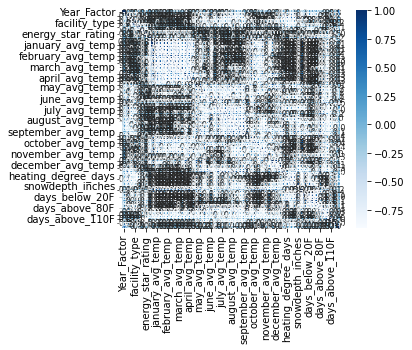

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# constructing heap to see correlation
#plt.figure(figsize=(8,8))
sns.heatmap(widsDf_corr, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

In [18]:
features = widsDf.drop('site_eui',axis=1)
outputLabel = widsDf['site_eui']
print(outputLabel)

0        248.682615
1         26.500150
2         24.693619
3         48.406926
4          3.899395
            ...    
75752    132.918411
75753     39.483672
75754     48.404398
75755    592.022750
75756     29.154684
Name: site_eui, Length: 75757, dtype: float64


In [19]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Imputation transformer for completing missing values.
imp_mean.fit(features)
features = imp_mean.transform(features)
features = pd.DataFrame(features)
features.head

<bound method NDFrame.head of         0    1    2     3         4       5           6     7     8   \
0      1.0  0.0  0.0  13.0   61242.0  1942.0   11.000000   2.4  36.0   
1      1.0  0.0  0.0  55.0  274000.0  1955.0   45.000000   1.8  36.0   
2      1.0  0.0  0.0  48.0  280025.0  1951.0   97.000000   1.8  36.0   
3      1.0  0.0  0.0   6.0   55325.0  1980.0   46.000000   1.8  36.0   
4      1.0  0.0  0.0  56.0   66000.0  1985.0  100.000000   2.4  36.0   
...    ...  ...  ...   ...       ...     ...         ...   ...   ...   
75752  6.0  2.0  0.0  32.0   20410.0  1995.0    8.000000  36.6  28.0   
75753  6.0  2.0  1.0   1.0   40489.0  1910.0   98.000000  36.6  28.0   
75754  6.0  2.0  0.0   2.0   28072.0  1917.0   61.048605  36.6  26.0   
75755  6.0  2.0  0.0   2.0   53575.0  2012.0   61.048605  36.6  26.0   
75756  6.0  2.0  1.0   0.0   23888.0  1974.0   51.000000  36.6  27.0   

              9   ...         49    50   51   52   53    54   55   56   57  \
0      50.500000  ...  56.9

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year_built', ylabel='Density'>

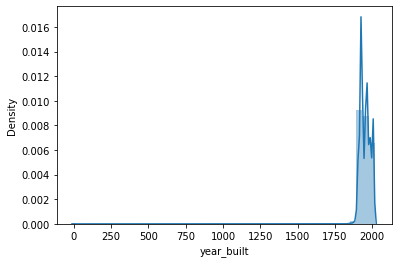

In [20]:
#sns.distplot(widsDf['energy_star_rating'])
sns.distplot(widsDf['year_built'])

In [21]:
# define min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(features)
print(scaled)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.32002746e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.64005491e-05]
 ...
 [1.00000000e+00 3.33333333e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.99973599e-01]
 [1.00000000e+00 3.33333333e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.99986800e-01]
 [1.00000000e+00 3.33333333e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, outputLabel, test_size=0.25, random_state=46)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


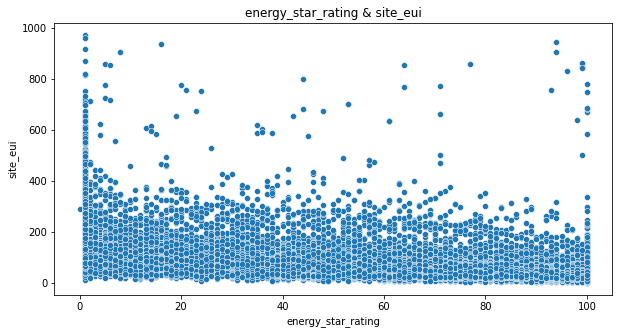

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
plt.title('energy_star_rating & site_eui')
plt.xlabel('energy_star_rating')
plt.ylabel('site_eui')
sns.scatterplot(widsDf['energy_star_rating'],widsDf['site_eui'])
plt.show()

In [24]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)


In [25]:
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
rmse

53.02174844883662

In [26]:
import xgboost

xgboost_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.03, gamma=0, subsample=0.75,
                           colsample_bytree=0.4, max_depth=3)
xgboost_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
predictions = xgboost_model.predict(X_test)
mse_xg = sklearn.metrics.mean_squared_error(y_test,predictions)
rmse_xg = math.sqrt(mse_xg)
rmse_xg

50.39371770374706

In [28]:
# from sklearn.model_selection import GridSearchCV
# xgb = xgboost.XGBRegressor()
# parameters = {'objective':['reg:linear'],
#               'learning_rate': [.02, .05, 0.01], #so called `eta` value
#               'max_depth': [3,5],
#               'min_child_weight': [4],
#               'subsample': [0.7],
#               'colsample_bytree': [0.4],
#               'n_estimators': [1000],
#               'reg_alpha': [0.4],
#               'reg_lambda': [2e-08]
# }
# xgb_grid = GridSearchCV(xgb,
#                         parameters,
#                         cv = 5,
#                         verbose=True)

# xgb_grid.fit(X_train,y_train)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [29]:
from sklearn.model_selection import KFold

In [30]:
kfold = KFold(n_splits=6)


In [31]:
from lightgbm import LGBMRegressor

In [32]:
y_train.shape

(56817,)

In [33]:
    
xgboost_mod = xgboost.XGBRegressor(colsample_bytree=0.4, learning_rate= 0.05, max_depth= 5, min_child_weight= 4,
                          n_estimators= 1000, reg_alpha=0.4, reg_lambda=2e-08, subsample= 0.7)
xgboost_mod.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.4, reg_lambda=2e-08, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
y_train

35687    122.816986
37782    107.743175
13936     84.715780
6645      47.508563
63304     66.218579
            ...    
5436      77.088798
36555     79.673699
51603     91.590298
56692     66.318306
30248    108.171781
Name: site_eui, Length: 56817, dtype: float64

In [35]:
predictions_mod = xgboost_mod.predict(X_test)
mse_xg = sklearn.metrics.mean_squared_error(y_test,predictions_mod)
rmse_xg = math.sqrt(mse_xg)
rmse_xg

43.45732658465215